In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
%matplotlib inline
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_img_train,y_label_train),\
(x_img_test,y_label_test)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
print("train:",len(x_img_train))
print("test:",len(x_img_test))

train: 50000
test: 10000


In [0]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [0]:
def plot_images_lables_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

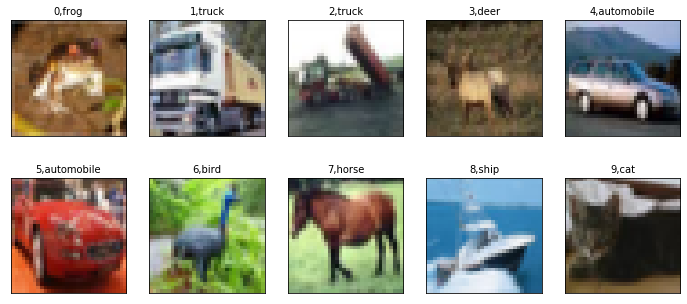

In [6]:
plot_images_lables_prediction(x_img_train,y_label_train,[],0)

In [7]:
x_img_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [0]:
x_img_train_normalize=x_img_train.astype('float32')/255.0
x_img_test_normalize=x_img_test.astype('float32')/255.0

In [9]:
x_img_train_normalize[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

In [10]:
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [0]:
y_label_train_OneHot=np_utils.to_categorical(y_label_train)
y_label_test_OneHot=np_utils.to_categorical(y_label_test)

In [12]:
y_label_train_OneHot.shape

(50000, 10)

In [13]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
# model-1
# model=Sequential()
# model.add(Conv2D(filters=32,
#                 kernel_size=(3,3),
#                 input_shape=(32,32,3),
#                 activation='relu',
#                 padding='same'))
# model.add(Dropout(0.25))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters=64,
#                 kernel_size=(3,3),
#                 activation='relu',
#                 padding='same'))
# model.add(Dropout(0.25))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dropout(0.25))
# model.add(Dense(1024,activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(10,activation='softmax'))
# print(model.summary())
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.2,epochs=200,batch_size=500,verbose=1)



# model-2
model=Sequential()
model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                input_shape=(32,32,3),
                activation='relu',
                padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                activation='relu',
                padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,
                kernel_size=(3,3),
                activation='relu',
                padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(filters=64,
                kernel_size=(3,3),
                activation='relu',
                padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,
                kernel_size=(3,3),
                activation='relu',
                padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(filters=128,
                kernel_size=(3,3),
                activation='relu',
                padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(2500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.2,epochs=200,batch_size=500,verbose=1)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         


In [0]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','test'],loc='upper left')
    plt.show()

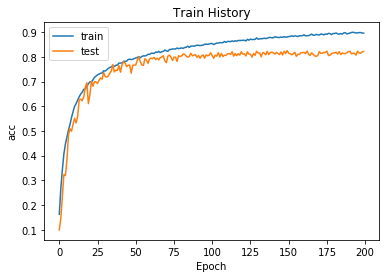

In [16]:
show_train_history(train_history,'acc','val_acc')

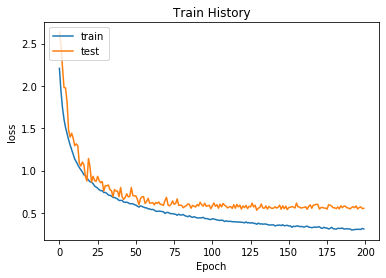

In [17]:
show_train_history(train_history,'loss','val_loss')

In [18]:
scores=model.evaluate(x_img_test_normalize,y_label_test_OneHot,verbose=0)
scores[1]

0.8128

In [0]:
prediction=model.predict_classes(x_img_test_normalize)

In [20]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

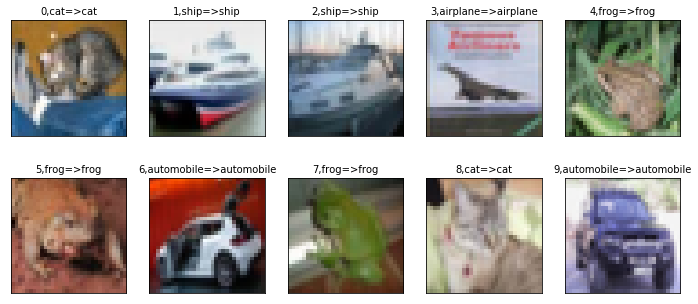

In [21]:
plot_images_lables_prediction(x_img_test,y_label_test,prediction,0,10)

In [0]:
Predicted_Probability=model.predict(x_img_test_normalize)

In [0]:
def show_Predicted_Probability(y,prediction,x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
         'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict: cat


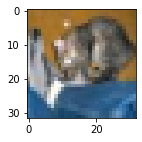

airplane Probability:0.000423347
automobile Probability:0.000070198
bird Probability:0.000603798
cat Probability:0.774996042
deer Probability:0.000784815
dog Probability:0.215788364
frog Probability:0.004627600
horse Probability:0.001551380
ship Probability:0.000514210
truck Probability:0.000640291


In [24]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,0)

label: airplane predict: airplane


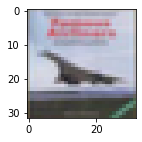

airplane Probability:0.870827019
automobile Probability:0.000890839
bird Probability:0.016844505
cat Probability:0.000598688
deer Probability:0.002245016
dog Probability:0.000166252
frog Probability:0.000372009
horse Probability:0.000152448
ship Probability:0.107402667
truck Probability:0.000500569


In [25]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,3)

In [26]:
prediction.shape

(10000,)

In [27]:
y_label_test.shape

(10000, 1)

In [28]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [29]:
y_label_test.shape

(10000, 1)

In [30]:
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,797,8,62,18,9,5,13,3,72,13
1,7,933,4,5,3,1,4,0,7,36
2,29,0,775,34,58,34,51,9,10,0
3,13,2,69,693,35,112,51,16,5,4
4,9,1,57,57,792,23,39,21,1,0
5,6,1,45,184,25,697,13,26,2,1
6,3,3,36,51,19,15,869,0,4,0
7,10,2,26,49,57,35,2,813,1,5
8,32,13,13,17,8,2,6,3,898,8
